In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow import keras
from tqdm import tqdm

In [2]:
train_dir='/kaggle/input/egyptian-hieroglyphs/train/'
val_dir='/kaggle/input/egyptian-hieroglyphs/valid/'
test_dir='/kaggle/input/egyptian-hieroglyphs/test/'

train_df_dir='/kaggle/input/egyptian-hieroglyphs/train/_annotations.csv'
val_df_dir='/kaggle/input/egyptian-hieroglyphs/valid/_annotations.csv'
test_df_dir='/kaggle/input/egyptian-hieroglyphs/test/_annotations.csv'

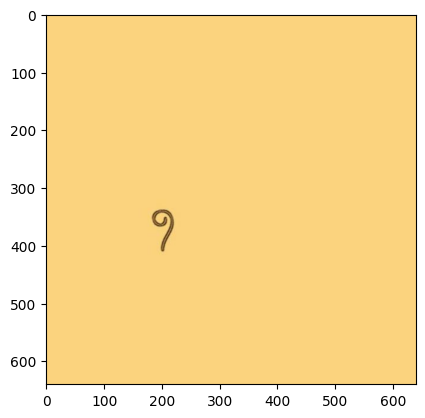

In [3]:
r=cv2.imread(train_dir+'100-1-_jpg.rf.49980299b8c88f71ceded2c7ae0192de.jpg')
r=cv2.cvtColor(r,cv2.COLOR_BGR2RGB)
plt.imshow(r)

In [4]:
df_train=pd.read_csv(train_df_dir)
df_val=pd.read_csv(val_df_dir)
df_test=pd.read_csv(test_df_dir)

df_train.head(10)

,filename,width,height,class,xmin,ymin,xmax,ymax
0,nile-fish-7-_jpg.rf.31e4278980878c47a1e6a2f8dd...,640,640,Nile_Fish,375,319,512,454
1,Her-8-_jpg.rf.32bcf63f4ae4d6aea53cea5b9c0059b4...,640,640,Her,211,247,368,339
2,composite_bow-34-_jpg.rf.33153e63f7158777c50d4...,640,640,Composite_Bow,158,183,336,282
3,snake-6-_jpg.rf.32ac52ece4bcc06b1ead936693df17...,640,640,Snake,181,351,318,506
4,king-26-_jpg.rf.329a5a8e366f4fe2e3a3dca88524cc...,640,640,King,218,290,339,524
5,fish-14-_jpg.rf.32c2bcf21548386e8ea3dab04a91d1...,640,640,Fish,352,126,534,245
6,fish-22-_jpg.rf.3269230d2a3f6616f742ae4e753408...,640,640,Fish,290,336,426,457
7,canal-9-_jpg.rf.330f4f09d72d4a128afc0c046367d3...,640,640,Canal,372,356,578,503
8,mother-9-_jpg.rf.3236ab666b1936299766aa96ce3bf...,640,640,Mother,221,94,348,294
9,giraffe-14-_jpg.rf.325508145b800d22da24a3091d6...,640,640,Giraffe,407,80,569,333


In [5]:
N_CLASSES = df_train['class'].nunique()
N_CLASSES

95

In [6]:
def process_split(df,data_dir) :
    new_size = 224    
    X_data = []
    y_data = []
    #labels_df.iterrows()
    for index, row in tqdm(df.iterrows()):
        image_file = row['filename']
        label = row['class'] 
        image_path = os.path.join(data_dir, image_file)
        orignal_image = cv2.imread(image_path)

        if orignal_image is not None:
            xmin = int(row['xmin'])
            ymin = int(row['ymin'])
            xmax = int(row['xmax'])
            ymax = int(row['ymax'])

            cropped_image = orignal_image[ymin:ymax, xmin:xmax]

            image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)
            resized_image = cv2.resize(image, (new_size, new_size))
            X_data.append(resized_image)
            y_data.append(label)
        else:
            print(f"Failed to read image: {image_file}")
    print("items in X_data is:       ",len(X_data) , " items") 
    print("items in y_data is:       ",len(y_data) , " items")
    return np.array(X_data),np.array(y_data)

In [7]:
x_train,y_train=process_split(df_train,train_dir)


2723it [00:19, 141.04it/s]


items in X_data is:        2723  items
items in y_data is:        2723  items


In [8]:
x_test,y_test=process_split(df_test,test_dir)

389it [00:03, 125.04it/s]


items in X_data is:        389  items
items in y_data is:        389  items


In [9]:
x_valid,y_valid=process_split(df_val,val_dir)

778it [00:07, 107.01it/s]

items in X_data is:        778  items
items in y_data is:        778  items


In [10]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_valid shape:", x_valid.shape)
print("y_valid shape:", y_valid.shape)

x_train shape: (2723, 224, 224, 3)
y_train shape: (2723,)
x_valid shape: (778, 224, 224, 3)
y_valid shape: (778,)


In [11]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_valid=x_valid.astype('float32')

x_train /= 255
x_test /= 255
x_valid/= 255

In [12]:
y_train = y_train.reshape(-1, 1)  #convert to 2d
y_test = y_test.reshape(-1, 1) 
y_valid = y_valid.reshape(-1, 1) 

In [13]:
y_train

array([['Nile_Fish'],
       ['Her'],
       ['Composite_Bow'],
       ...,
       ['Nursing'],
       ['This'],
       ['Owl']], dtype='<U21')

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.fit_transform(y_test)
y_valid=le.fit_transform(y_valid)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, N_CLASSES)
y_valid = to_categorical(y_valid, N_CLASSES)
y_test =  to_categorical(y_test, N_CLASSES)

In [16]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

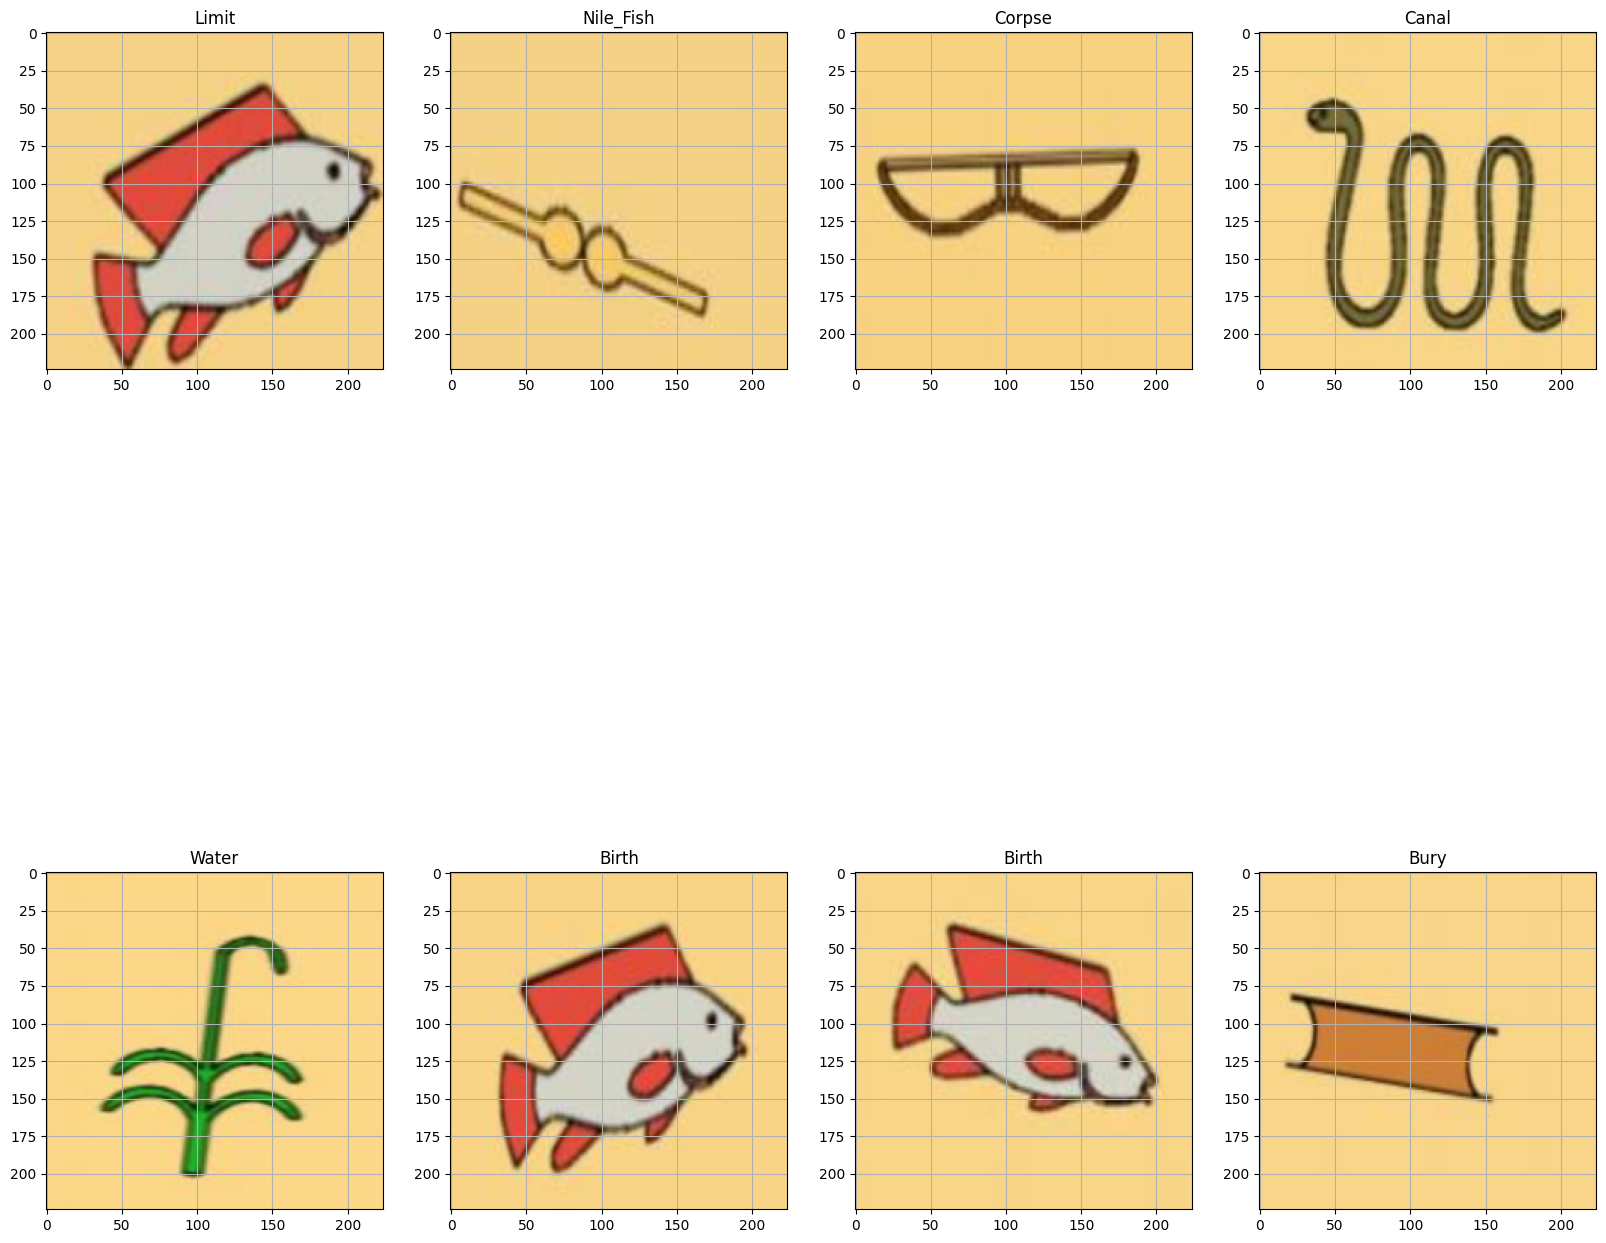

In [17]:
classes=list((set(df_train['class'])))
plt.figure(figsize=(20,20))
    # create a grid of 3x3 images
for i in range(0,8):
    plt.subplot(2,4,i+1)
    plt.imshow(x_train[i])
    plt.title(classes[np.where(y_train[i]==1)[0][0]])   # when y is categorical
    # plt.title(classes[int(y_batch[i])])   # when y is binary or sparse 
    plt.grid(None)
plt.show()


In [18]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_valid shape:", x_valid.shape)
print("y_valid shape:", y_valid.shape)

x_train shape: (2723, 224, 224, 3)
y_train shape: (2723, 95)
x_valid shape: (778, 224, 224, 3)
y_valid shape: (778, 95)


In [59]:
# Build the custom model with Conv2D layers
model = keras.models.Sequential()

# Add custom convolutional layers
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(256, (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(256, (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2, 2)))


# Add global pooling to reduce dimensions
model.add(keras.layers.GlobalAveragePooling2D())

# Add fully connected layers


model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))

# Output layer (adjust 95 to the number of classes in your dataset)
model.add(keras.layers.Dense(95, activation='softmax'))



In [60]:
model.compile(loss='categorical_crossentropy',optimizer='adam',
              metrics=['acc','precision','recall'])

In [61]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 52, 52, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 10, 10, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 3, 3, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 3, 3, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │             

 Total params: 1,060,991 (4.05 MB)

 Trainable params: 1,058,815 (4.04 MB)

 Non-trainable params: 2,176 (8.50 KB)

In [62]:
from keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint
early_stopping = EarlyStopping(
    monitor='val_loss',  
    patience=5,          
    restore_best_weights=True 
)


checkpoint = ModelCheckpoint(
    filepath='best_model.keras',  
    monitor='val_loss',  
    save_best_only=True,
    mode='min'
)


In [24]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_valid shape:", x_valid.shape)
print("y_valid shape:", y_valid.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


x_train shape: (2723, 224, 224, 3)
y_train shape: (2723, 95)
x_valid shape: (778, 224, 224, 3)
y_valid shape: (778, 95)
x_test shape: (389, 224, 224, 3)
y_test shape: (389, 95)


In [25]:
print(f"x_train has None values: {np.any([x is None for x in x_train])}")
print(f"y_train has None values: {np.any([y is None for y in y_train])}")
print(f"x_valid has None values: {np.any([x is None for x in x_valid])}")
print(f"y_valid has None values: {np.any([y is None for y in y_valid])}")


x_train has None values: False
y_train has None values: False
x_valid has None values: False
y_valid has None values: False


In [63]:
history = model.fit(
    x_train,              
    y_train,              
    epochs=30,
    batch_size=32,
    validation_data=(x_valid, y_valid),
    callbacks=[early_stopping, checkpoint],
)


Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - acc: 0.0683 - loss: 4.5249 - precision: 0.3654 - recall: 0.0029

I0000 00:00:1729878952.144907     109 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_3', 148 bytes spill stores, 148 bytes spill loads



86/86 ━━━━━━━━━━━━━━━━━━━━ 26s 156ms/step - acc: 0.0690 - loss: 4.5186 - precision: 0.3668 - recall: 0.0029 - val_acc: 0.0141 - val_loss: 4.8836 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - acc: 0.2916 - loss: 2.8819 - precision: 0.5824 - recall: 0.0329 - val_acc: 0.0129 - val_loss: 5.3784 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - acc: 0.4707 - loss: 1.9942 - precision: 0.7817 - recall: 0.1172 - val_acc: 0.0077 - val_loss: 6.3098 - val_precision: 0.0098 - val_recall: 0.0077
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - acc: 0.5692 - loss: 1.5545 - precision: 0.8176 - recall: 0.2439 - val_acc: 0.0360 - val_loss: 5.9155 - val_precision: 0.0306 - val_recall: 0.0077
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - acc: 0.6020 - loss: 1.3577 - precision: 0.8070 - recall: 0.3421 - val_acc: 0.1710 - val_loss: 3.6601 - val_precision: 0.2340 - val_recall: 0.084

In [65]:
model.save('cnn_egyptian-hieroglyphs.h5')


In [66]:
train_loss, train_accuracy, train_precision, train_recall= model.evaluate(x_train,y_train)
test_loss, test_accuracy, test_precision, test_recall= model.evaluate(x_test,y_test)

86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - acc: 0.9806 - loss: 0.0576 - precision: 0.9853 - recall: 0.9782
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - acc: 0.5229 - loss: 6.4933 - precision: 0.5255 - recall: 0.5102


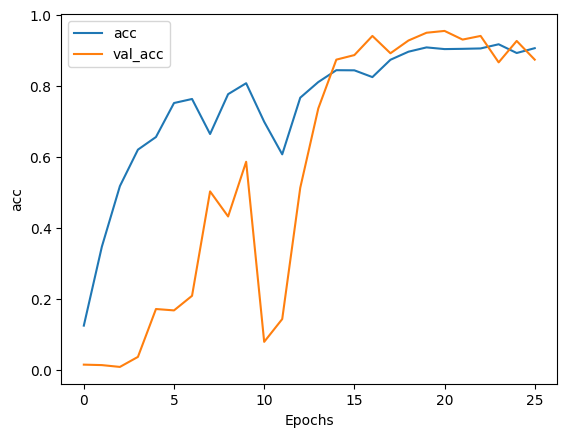

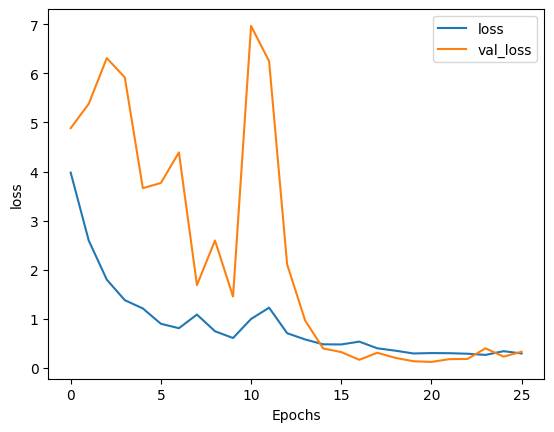

In [64]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+ string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string,'val_'+ string ])
  plt.show()

plot_graphs(history, 'acc')
plot_graphs(history, 'loss')

In [67]:
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score



y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

y_train_pred_class = np.argmax(y_train_pred, axis=1)
y_test_pred_class = np.argmax(y_test_pred, axis=1)

y_train_true = np.argmax(y_train, axis=1)
y_test_true = np.argmax(y_test, axis=1)

accuracy_train = accuracy_score(y_train_true, y_train_pred_class)
accuracy_test = accuracy_score(y_test_true, y_test_pred_class)

f1_train = f1_score(y_train_true, y_train_pred_class, average='weighted')
f1_test = f1_score(y_test_true, y_test_pred_class, average='weighted')

precision_train = precision_score(y_train_true, y_train_pred_class, average='weighted')
precision_test = precision_score(y_test_true, y_test_pred_class, average='weighted')

recall_train = recall_score(y_train_true, y_train_pred_class, average='weighted')
recall_test = recall_score(y_test_true, y_test_pred_class, average='weighted')

print(f"Training Accuracy: {accuracy_train:.2f}")
print(f"Test Accuracy: {accuracy_test:.2f}")
print(f"Training F1 Score: {f1_train:.2f}")
print(f"Test F1 Score: {f1_test:.2f}")
print(f"Training Precision: {precision_train:.2f}")
print(f"Test Precision: {precision_test:.2f}")
print(f"Training Recall: {recall_train:.2f}")
print(f"Test Recall: {recall_test:.2f}")


86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Training Accuracy: 0.98
Test Accuracy: 0.54
Training F1 Score: 0.98
Test F1 Score: 0.55
Training Precision: 0.99
Test Precision: 0.56
Training Recall: 0.98
Test Recall: 0.54


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
data = {
    'model': ['CNN'],
    'Accuracy train': [accuracy_train],
    'Accuracy test': [accuracy_test],
    'Precision train': [precision_train],
    'Precision test': [precision_test],
    'Recall train': [recall_train],
    'Recall test': [recall_test],
    'F1-score train': [f1_train],
    'F1-score test': [f1_test]
}


metrics_df = pd.DataFrame(data)
metrics_df

,model,Accuracy train,Accuracy test,Precision train,Precision test,Recall train,Recall test,F1-score train,F1-score test
0,CNN,0.984943,0.544987,0.986707,0.55934,0.984943,0.544987,0.984754,0.546656
